# Methods for Improving Neural Network Performance 

1) Early Stopping

2) Regularization (L1 and L2)

3) Dropout Layers

4) Reduce complexity or Increase Dataset

# Dropout Method

Dropout is a regularization technique commonly used in deep neural networks (DNNs) to prevent overfitting and improve generalization performance. It involves temporarily "dropping out" (i.e., setting to zero) a random subset of the neurons in a neural network layer during training. 

So this is similar to Ensemble Technique used in Randon Forest where for each epoch, random inputs or neurons are dropped out to introduce generalization. Dropout can be added as a percentage between each pair of hidden layers and model will drop that fraction of outputs between hidden layers.

Apply Dropout in the last hidden layer and propagate backwards based on accuracy outcomes

DNN / ANN  --> Dropout = 20 - 50%

CNN        --> Dropout = 40 - 50%

RNN / LSTM --> Dropout = 20 - 30%

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout ###************
from tensorflow.keras.callbacks import EarlyStopping ########**************
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

# Generate your own dataset

In [3]:
X_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

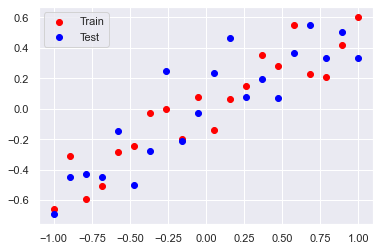

In [7]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Build a basic Sequential Model without Dropout

In [10]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation = 'relu'))
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(1, activation = 'linear'))       # activation = 'linear' since it's a linear regression problem
model_1.compile(loss='mse', optimizer='adam', metrics=['mse'])    # loss='mse' & metrics=['mse'] as it's a linear reg problem
history = model_1.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [14]:
# Evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train : {}%, Test : {}%'.format(round(train_mse*100, 2), round(test_mse*100, 2)))
# High variance between Train and Test error

Train : 0.99%, Test : 3.84%


# Build another model with Dropout

In [18]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation = 'relu'))

# Add a Dropout
model_2.add(Dropout(0.2))                                  
model_2.add(Dense(128, activation = 'relu'))

# Add another Dropout
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation = 'linear'))

model_2.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model_2.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [17]:
# evaluate the model
_,train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_,test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train : {}%, Test : {}%'.format(round(train_mse*100, 2), round(test_mse*100, 2)))

Train : 1.33%, Test : 3.45%


# Build another model by varying the Dropout

In [39]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=1, activation = 'relu'))

# Add a Dropout
model_3.add(Dropout(0.2))  
model_3.add(Dense(128, activation = 'relu'))

# Add a Dropout
model_3.add(Dropout(0.2))
model_3.add(Dense(128, activation = 'relu'))

# Add a Dropout
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation = 'linear'))

# Add a Dropout
model_3.add(Dropout(0.2))
model_3.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model_3.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [40]:
# evaluate the model
_,train_mse = model_3.evaluate(X_train, y_train, verbose=0)
_,test_mse = model_3.evaluate(X_test, y_test, verbose=0)
print('Train : {}%, Test : {}%'.format(round(train_mse*100, 2), round(test_mse*100, 2)))

Train : 2.21%, Test : 4.14%


In [41]:
# This way we can vary the Dropout Percentage and get better accuracies